In [29]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

# Define the random seeds

import tensorflow  as tf
tf.random.set_seed(101)

In [30]:
base_dir = "Capstone"
base_dir

'Capstone'

In [31]:
train_dir = base_dir+"/train"


In [32]:


train_dir_content = os.listdir(train_dir)

print("Number of classes : ", len(train_dir_content))

print("Classes: ", train_dir_content)

values, counts = np.unique(train_dir_content, return_counts=True)

Number of classes :  5
Classes:  ['palm', '.ipynb_checkpoints', 'down', 'fists', 'up']


In [33]:
test_dir = base_dir+"/test"

test_dir_content =  os.listdir(test_dir)

print("Number of classes : ", len(test_dir_content))

print("Classes: ", test_dir_content)

values, counts = np.unique(test_dir_content, return_counts=True)

Number of classes :  5
Classes:  ['palm', '.ipynb_checkpoints', 'down', 'fists', 'up']


In [35]:
for i in range(5):
    print('Number of samples in class named: ',train_dir_content[i],':',len(os.listdir(train_dir+'/'+ train_dir_content[i])))

Number of samples in class named:  palm : 46
Number of samples in class named:  .ipynb_checkpoints : 0
Number of samples in class named:  down : 50
Number of samples in class named:  fists : 64
Number of samples in class named:  up : 44


In [36]:
from keras.preprocessing.image import ImageDataGenerator

#train_dir = to_categorical(train_dir)
#test_dir = to_categorical(test_dir)
#train_dir /= 255
#test_dir /= 255
# Create data generator for training set
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

# Create data generator for test set. 
test_datagen = ImageDataGenerator(rescale=1./255)

# Create an iterator for training set. 
# We want to use the data generator to read in 16 images at a time (batch_size = 16).
# Don't change the original size of the images.
train_iter = train_datagen.flow_from_directory(
        train_dir,
        seed=101,
        target_size=(100,100),
        batch_size=16)



# Create an iterator for test set. 
# We want to use the data generator to read in 16 images at a time (batch_size = 16).
# Don't change the original size of the images.

test_iter = test_datagen.flow_from_directory(
        test_dir,
        seed=101,
        class_mode=None,
        target_size=(100,100),
        batch_size=16,
        shuffle=False
    )





Found 204 images belonging to 5 classes.
Found 88 images belonging to 5 classes.


In [37]:
# confirm the iterator works
batchX, batchy = train_iter.next()



print('Batch shape of X=%s, X min=%.3f, X max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

print('Batch shape of y=%s, y min=%.3f, y max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))

Batch shape of X=(16, 100, 100, 3), X min=0.001, X max=0.934
Batch shape of y=(16, 5), y min=0.000, y max=1.000


In [38]:
label_dict = train_iter.class_indices


label_dict

{'.ipynb_checkpoints': 0, 'down': 1, 'fists': 2, 'palm': 3, 'up': 4}

In [40]:
def findKeyFromValue(dict, val):
  '''
  Arguments: 
  1) dict: a dictionary <key: value>
           with fruit names as the key and numerical labels as the value
  2) val: a numerical label to be converted to 'descriptive'
  Return: 
  The key out of the <key: value> pair. 
  '''
  for key, value in dict.items():
    if val == value:
        return key



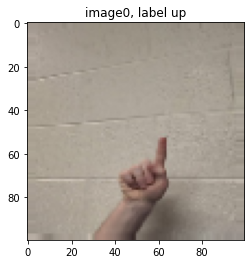

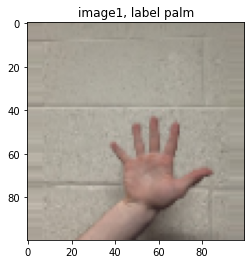

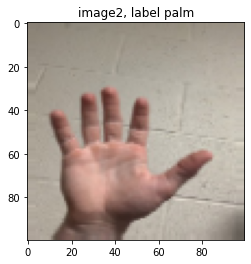

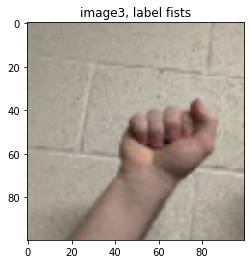

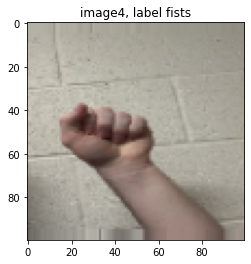

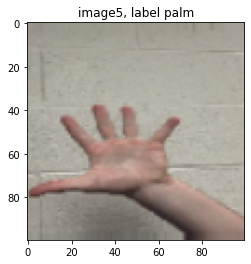

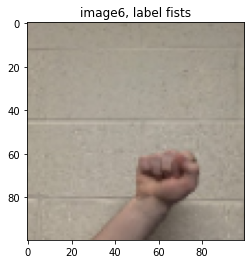

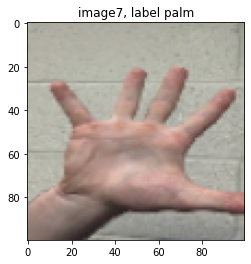

In [41]:
for i in range (8):
    
    plt.title("image"+str(i)+", label "+ findKeyFromValue(label_dict,batchy[i].argmax()))
    plt.imshow(batchX[i])
    plt.show()


In [42]:
import cv2

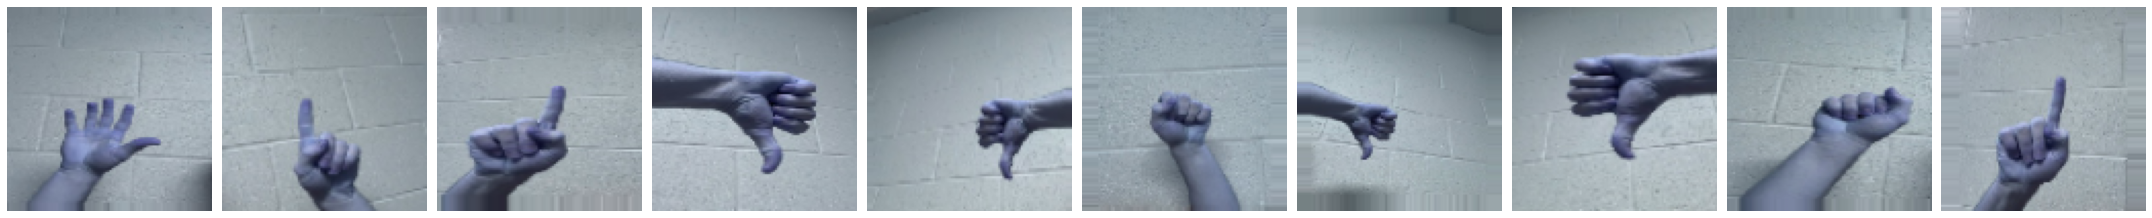

(16, 100, 100, 3)
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [43]:
imgs, labels = next(train_iter) 
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [45]:
# Dimensions of our images.
img_width, img_height = 100, 100  
input_shape = (img_width, img_height, 3)

# Epochs
epochs = 10

# Number of images to read every iteration 
batch_size = 16

# Total number of images for training and testing
train_num = 204
test_num = 88

# Total number of steps in each epoch
train_steps = train_num // batch_size # integer division
test_steps  = test_num  // batch_size 

# Total number of classes
num_classes = 5


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [47]:
model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 15)        420       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 15)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 36015)             0         
                                                                 
 dense (Dense)               (None, 256)               9220096   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                        

In [48]:
# defining optimizer
from tensorflow.keras.optimizers import Adam # - Works
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compile the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy',
              metrics=['accuracy'])


/home/lip/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
history = model.fit_generator(train_iter,
                              steps_per_epoch=train_steps,
                              epochs=epochs,
                              validation_data=test_iter,
                              validation_steps=test_steps)

/home/lip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
12/12 [==============================] - 2s 113ms/step - loss: 6.9495 - accuracy: 0.2340 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 1s 116ms/step - loss: 2.3653 - accuracy: 0.2766 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 1s 104ms/step - loss: 1.4207 - accuracy: 0.3298 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 1s 111ms/step - loss: 1.2847 - accuracy: 0.4468 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 1s 103ms/step - loss: 1.2465 - accuracy: 0.4574 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 1s 111ms/step - loss: 1.1338 - accuracy: 0.5479 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 1s 110ms/step - loss: 0.9807 - accuracy: 0.6011 

In [50]:
score = model.evaluate_generator(train_iter, steps=test_steps)
print("Test loss:", score[0])

print("Test accuracy:", score[1])

/home/lip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss: 0.7267730832099915
Test accuracy: 0.7875000238418579


In [51]:
model.save('my_model') 

INFO:tensorflow:Assets written to: my_model/assets


In [53]:
word_dict = {'.ipynb_checkpoints': 0, 'down': 1, 'fists': 2, 'palm': 3, 'up': 4}
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

predictions on a small set of test data--



KeyError: 2

In [54]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [55]:
model = tf.keras.models.load_model('my_model')

background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

In [56]:
#Function to calculate the background accumulated weighted average

def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [57]:
#Segmenting the hand, i.e, getting the max contours and the thresholded image of the hand detected.

def segment_hand(frame, threshold=25): 
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)

    
    _ , thresholded = cv2.threshold(diff, threshold, 255,cv2.THRESH_BINARY)
    
     #Fetching contours in the frame (These contours can be of hand
#or any other object in foreground) …

    image, contours, hierarchy =cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    # If length of contours list = 0, means we didn't get any
    #contours
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the
  #thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

In [58]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...
